# Example for running a multislice simulation with TEMSIM
This is a comprehensive example on how to use the python wrapper class `Multislice` to run a multislice simulation with the TEMSIM package.
- [Basic setup](#Setting-up-a-simulation)
    - [Running a simulation](#Running-the-simulation)
    - [Monitoring the simulation](#Monitoring-the-simulation)
    - [Diffraction pattern](#Diffraction-pattern-and)
    - [Beam evolution](#Beam-evolution-as-a-function-of-thickness)
    - [Loading a simulation](#Loading-a-simulation)

In [1]:
import multislice.multislice as mupy       # the temsim wrapper module
from utils import*                         # utilities

using dpi=96
using screenszie=[20.0,11.25] inches
warning setting usetex=False


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeXk, Version 3.141592-1.40.3 (Web2C 7.5.6)
 %&-line parsing enabled.
entering extended mode

(/home/lii26466/.cache/matplotlib/tex.cache/9eb8ed50c4f119894612567ddda7eb11.te
x
LaTeX2e <2005/12/01>
Babel <v3.8h> and hyphenation patterns for english, usenglishmax, dumylang, noh
yphenation, arabic, basque, bulgarian, coptic, welsh, czech, slovak, german, ng
erman, danish, esperanto, spanish, catalan, galician, estonian, farsi, finnish,
 french, greek, monogreek, ancientgreek, croatian, hungarian, interlingua, ibyc
us, indonesian, icelandic, italian, latin, mongolian, dutch, norsk, polish, por
tuguese, pinyin, romanian, russian, slovenian, uppersorbian, serbian, swedish, 
turkish, ukenglish, ukrainian, loaded.
(/usr/share/texmf/tex/latex/base/article.cls
Document Class: article 2005/09/16 v1.4f Standard LaTeX document class
(/usr/share/texmf/tex/latex/base/size10.clo))
(/usr/share/texmf/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 9eb8ed50c4f119894612567ddda7eb11.log.




<Figure size 432x288 with 1 Axes>

## Setting up a simulation 
For this example,  Electron Diffraction of Silicon in the zone axis [110] orientation is simulated at $200keV$. The program **autoslic** of the TEMSIM package is going to be used which assumes that the sample is not periodic along the beam axis.

### Choosing the simulation type
- `path` : This is the working directory for the simulation. The basename of the folder is used as a prefix for the name of the simulation. The naming convention for the produced files is : *folder_name*\_*tag*\_*program*.
- `tag` : An optional string to be used in the naming convention. We will used 'example_0' as the tag.
- `mulslice` : We consider that the sample is not periodic along the beam. The program **autoslic** will be used hence setting `mulslice=False`.
- `data` : The file containing the crystal information, in particular the atomic coordinates oriented in such a way that the beam is along the $z$ direction. 


In [2]:
path = 'data/test/'
args = {'name':path,'mulslice':False,'data':'Si110.xyz','tag':'example_0'}

### Specifying the parameters  
- `keV` : The simulation is performed at $200keV$
- `repeat` : The super cell setup in x,y and z. Here the crystal is a 2x2 in the transverse plane and 10 unit cells thick.
- `NxNy` : The real space sampling for the electrostatic potential. This also happens to be the reciprocal space sampling (or number of beams) as the multislice algorithm uses the discrete Fourier transform (DFT). 
- `slice_thick` : the thickness of the slices.
- `Nhk` : The beams index which are going to be recorded as the incident beam propagates along the sample. `Nhk=3` means that the beams $h,k=(0,0),(1,0),(0,1),(1,1)...$ up to $h,k=(3,3)$ are going to be recorded. Note that using this convention, since the super cell is $2\times 2$ the actual beam recorded for index $h,k=(1,1)$ is $q_x,q_y=(2,2)$.

In [3]:
args.update({'keV':200,'repeat':[2,2,100],'NxNy':512,'slice_thick':1.91,'Nhk':3})

### Running the simulation 
The simulation can be run by creating an instance of the `Multislice` wrapper class. 

The argument `opt='srf'` is used to : 
- 's' : save the instanciated Multislice object into a .pkl  
- 'r' : create a .sh job, a .in input file fed to TEMSIM  and run the job 
- 'f' : force the simulation to be run again even though it has already been done in the past. 

The argument `ssh` provides the name of the machine where the job is to be run. Here we specify `badb` which is registered as a cluster and will therefore run the job through the sun grid engine.

In [4]:
multi=mupy.Multislice(opt='srf',ssh='badb',**args)

Simu name pattern = test_example_0_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 383.959 A
Decks saved :
/data3/lii26466/multislice/test/test_example_0_autoslic.in
object saved
/data3/lii26466/multislice/test/test_example_0_autoslic.pkl
/data3/lii26466/multislice/test/test_example_0_autoslic.sh

test_example_0_autoslic job submitted at Fri Apr 16 11:09:32 2021


You can see the content of the generated files by calling : 
- `print_datafiles` : for the .xyz file
- `print_decks` : the input file fed to temsim 
- `print_job` : the job that was submitted 


In [5]:
multi.print_datafiles()
multi.print_decks()
multi.print_job()

######################################################################
			.xyz FILES :
######################################################################
Si110.xyz
one unit cell of 110 silicon
3.83959 5.4300 3.83959
14 0 0 0 1.0 0.08
14 0 1.3575 1.91979 1.0 0.08
14 1.91979 2.7150 1.91979 1.0 0.08
14 1.91979 4.0725 3.83959 1.0 0.08
-1



######################################################################
			*.in FILES :
######################################################################
test_example_0_autoslic.in
/data3/lii26466/multislice/test/Si110.xyz
2 2 100
/data3/lii26466/multislice/test/test_example_0_autoslic.tif
n
n
200.0000
512 512
0.0000 0.0000 
1.910000
y
/data3/lii26466/multislice/test/test_example_0_autoslic_beams.txt
9
0 0
2 0
4 0
0 2
2 2
4 2
0 4
2 4
4 4
n
n
y
/data3/lii26466/multislice/test/test_example_0_autoslic_pattern.txt
100
######################################################################
			.sh FILE :
################################################

### Monitoring the simulation 
if you want to check the status of the simulation, `wait_simu()` can be called.

In [6]:
multi.wait_simu()

0
0
0
0
0
0
0
0
init
init
init
init
init
init
init
init
init
init
init
processing
processing
processing
done


TEMISIM will generate a **.log** file with progress on the simulation. The content of this output can be viewed by calling `print_log()`. For each slice, the number of coordinates can be seen as well as the integrated intensity. Since the value is close to 1, this means that the sampling is good enough. 

In [7]:
multi.print_log() 

######################################################################
			.log FILE :
######################################################################

------------------------------------------------------------------------------
------------------------------------------------------------------------------
This header has been produced by multislice library
version : 1.4.2
date : Fri Apr 16 11:09:32 2021
author : Tarik Ronan Drevon
e-mail : tarik.drevon@stfc.ac.uk
------------------------------------------------------------------------------
------------------------------------------------------------------------------
autoslic(e) version dated 2-jun-2014 (ejk)
Copyright (C) 1998-2013 Earl J. Kirkland
This program is provided AS-IS with ABSOLUTELY NO WARRANTY
 under the GNU general public license

perform CTEM multislice with automatic slicing and FFTW
and multithreaded using openMP
 
Name of file with input atomic coord. in x,y,z format:
Replicate unit cell by NCELLX,NCELLY,NC

### Diffraction pattern
The diffraction pattern can be seen by calling `pattern`. 

displaying pattern: (512, 512)


(<Figure size 960x1080 with 2 Axes>,
 <AxesSubplot:xlabel='$q_x(\\AA^{-1})$', ylabel='$q_y(\\AA^{-1})$'>)

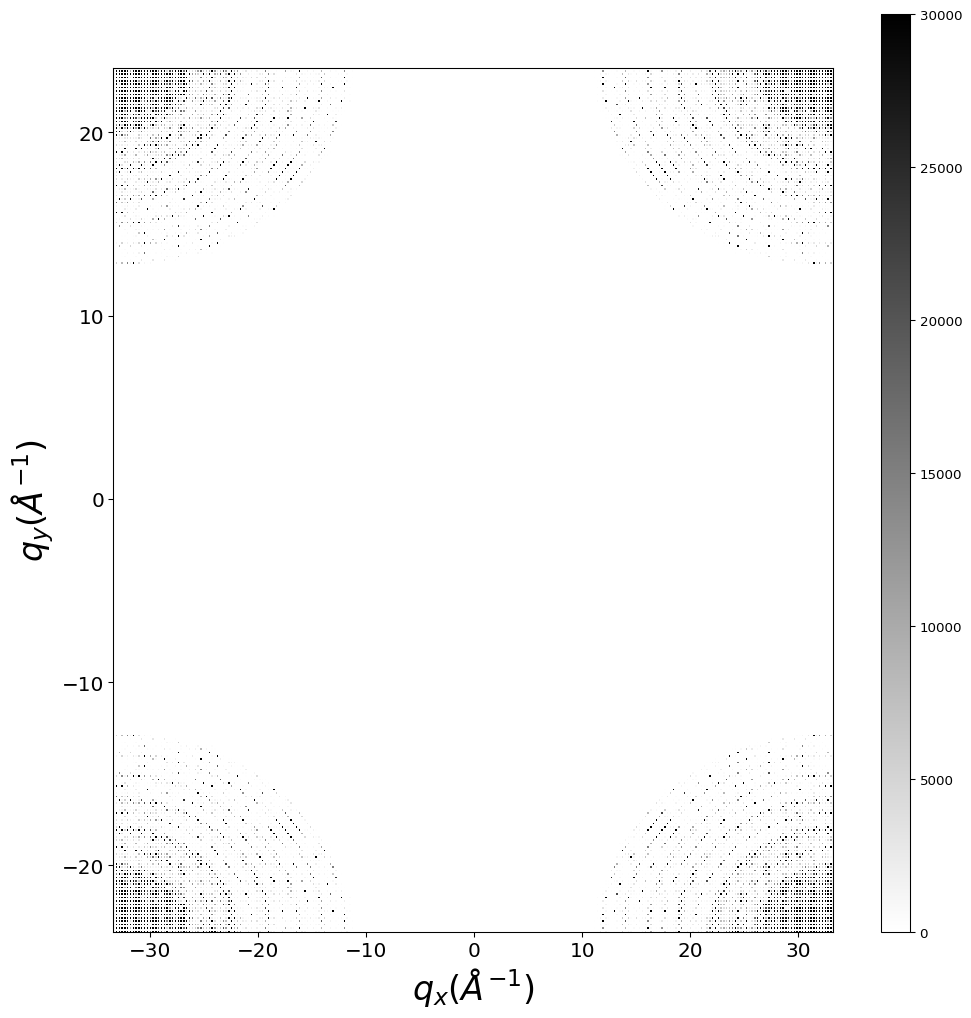

In [8]:
multi.pattern(Iopt='',caxis=[0,30000])

The argument `Iopt` gives some additional options for better rendering : 
- n(normalize): normalize the intensity so that the intensity of the brightest peak is 1.  
- s(fftshift) : use fftshift to display 
- c(crop)     : crop up to `Nmax` pixel. If `tol` is set, then crop up to $I<tol$.
- l(log)      : display colormap in logscale

displaying pattern: (512, 512)
displaying pattern: (512, 512)
displaying pattern: (100, 100)
displaying pattern: (302, 302)


(<Figure size 960x1080 with 4 Axes>,
 <AxesSubplot:title={'center':'logscale and crop to tol'}, xlabel='$q_x(\\AA^{-1})$', ylabel='$q_y(\\AA^{-1})$'>)

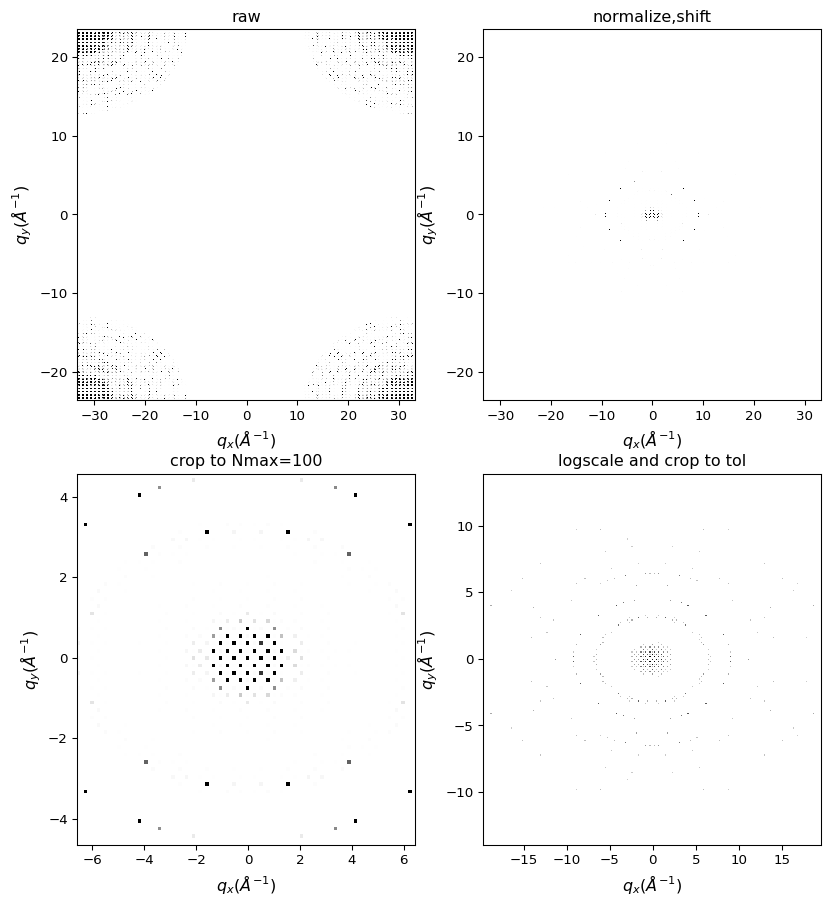

In [9]:
fig,((ax1,ax2),(ax3,ax4)) = dsp.create_fig(rc='22')
cmap,fonts = 'binary',{'lab':12,'title':12,'tick':10}
multi.pattern(Iopt=''             ,caxis=[0,30000],pOpt='t',cmap=cmap,fonts=fonts,title='raw',ax=ax1,fig=fig)
multi.pattern(Iopt='sn'           ,caxis=[0,0.01] ,pOpt='t',cmap=cmap,fonts=fonts,title='normalize,shift',ax=ax2,fig=fig)
multi.pattern(Iopt='snc',Nmax=50  ,caxis=[0,0.01] ,pOpt='t',cmap=cmap,fonts=fonts,title='crop to Nmax=100',ax=ax3,fig=fig)
multi.pattern(Iopt='cnsl',tol=1e-4,caxis=[-5,0]   ,pOpt='t',cmap=cmap,fonts=fonts,title='logscale and crop to tol',ax=ax4,fig=fig)

### Beam evolution as a function of thickness 
The evolution of the main important beam as a function of propagation into the sample is display by calling `beam_vs_thickness`.

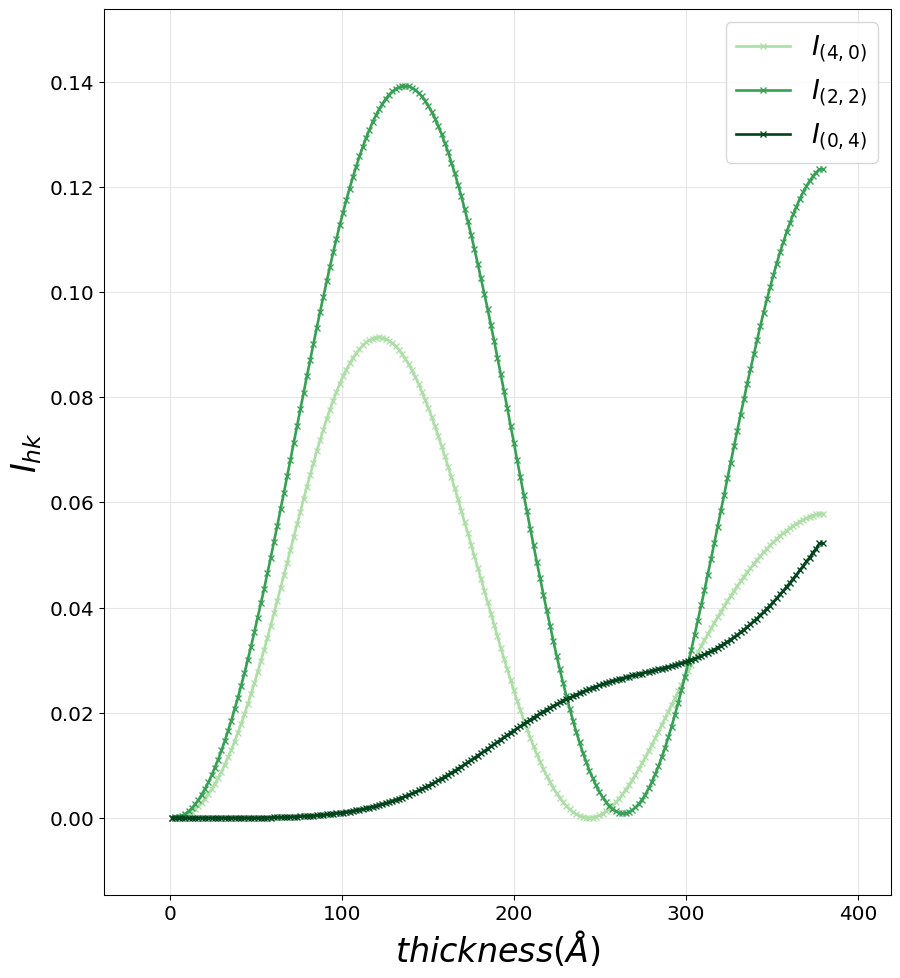

In [10]:
multi.beam_vs_thickness()

## Loading a simulation 
A Multislice object previously saved can be loaded with the `load` function from the `postprocess` library. Just indicate the path of the simulation and the `tag` of the simulation if one was specified. Here, we used it to simply check what version of the Multislice class was used to produce the object.

In [11]:
import multislice.postprocess as pp        # postprocessing library
multi = pp.load(path,'example_0')
print('Multislice version:',multi.version)

loading data/test/test_example_0_autoslic.pkl
Multislice version: 1.4.2
